# RS Index
-  Relative Strength Rating ของ William O’Neil 

In [5]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML 

# กำหนด path ไปยังโฟลเดอร์ 'libs' ที่อยู่ข้างนอกของ 'subfolder'
# ใช้ os.path.abspath สำหรับการรับ absolute path
libs_path = os.path.abspath(os.path.join(os.getcwd(), '..', ''))

# ใส่ path นี้ไปที่ตำแหน่งแรกใน sys.path เพื่อให้ Python ค้นหาที่นี่ก่อน
if libs_path not in sys.path:
    sys.path.insert(0, libs_path)

import starfishXapi as sx
from starfishXapi.set_api import indexType
sx.enable_autoreload()
print(sx.__version__)

Autoreload enabled.
0.00104


In [7]:
# สร้าง object dataReader
dataReader = sx.HistStockPrice()
dataReader.openLog(directory='cache/') # สร้าง folder cache/

*you are using nologin method, data you access may be limited


False

In [9]:
# หาสมาชิกในดัชนี set100
member = sx.get_member_of_index(indexType.set100)
basket = list(member['symbol'])
basket.append('SET')
for i in basket:
   print(f'{i},',end='')

AAV,ADVANC,AEONTS,AMATA,AOT,AP,AWC,BA,BAM,BANPU,BBL,BCH,BCP,BCPG,BDMS,BEM,BGRIM,BH,BJC,BLA,BSRC,BTG,BTS,CBG,CENTEL,CHG,CK,CKP,COM7,CPALL,CPF,CPN,CRC,DELTA,DOHOME,EA,EGCO,ERW,GLOBAL,GPSC,GULF,GUNKUL,HANA,HMPRO,ICHI,INTUCH,IRPC,ITC,IVL,JAS,JMART,JMT,KBANK,KCE,KKP,KTB,KTC,LH,M,MBK,MEGA,MINT,MTC,OR,OSP,PLANB,PRM,PTT,PTTEP,PTTGC,QH,RATCH,RBF,RCL,SAPPE,SAWAD,SCB,SCC,SCGP,SIRI,SISB,SJWD,SKY,SPALI,SPRC,STA,STGT,TASCO,TCAP,TIDLOR,TIPH,TISCO,TLI,TOA,TOP,TRUE,TTB,TU,VGI,WHA,SET,

In [11]:
# add member to basket 
basket = basket + ['MC','JMART','JMT','SGC','DUSIT','ERW','BTG','SYMC','HUMAN','TKN','ILM','AURA','D','MGI','SPVI']
basket = list(set(basket))

In [13]:
import time

start_date = '2024-01-01'
stop_date = '2024-09-26'  
folder = 'cache/'

# preprocess data Load to Cache
while(1):
  c = 0  
  try:  
    for i in basket:
      c+=1  
      print(i,end=',')    
      df = dataReader.getPrice(i,start=start_date,stop=stop_date,cache=True) # สำรองข้อมูลลง cache  
  except:
    time.sleep(3)
    print('try again')  
  if(c==len(basket)):
     break 

ILM,RBF,MC,SJWD,ERW,CPALL,BH,BA,BTS,LH,CKP,BSRC,ICHI,TOP,BLA,BEM,COM7,DELTA,CK,TOA,SYMC,SET,CBG,GLOBAL,TLI,OR,BBL,AOT,TASCO,CRC,MBK,BDMS,AURA,DUSIT,BANPU,GPSC,KKP,EA,IVL,AWC,SPALI,QH,RATCH,SAPPE,PTT,CPN,SISB,GUNKUL,EGCO,SCGP,RCL,ITC,BGRIM,MTC,CENTEL,BCP,TU,MEGA,KBANK,PTTEP,TKN,MINT,TIPH,CPF,KTB,TISCO,TRUE,GULF,BJC,SAWAD,D,SIRI,IRPC,HMPRO,AEONTS,KCE,STA,HANA,SCB,PTTGC,MGI,KTC,SPRC,TIDLOR,VGI,WHA,CHG,BAM,AP,OSP,DOHOME,BCH,STGT,HUMAN,BCPG,JAS,SKY,SGC,AAV,INTUCH,TCAP,JMT,ADVANC,PLANB,AMATA,TTB,SCC,JMART,BTG,M,PRM,SPVI,

In [15]:
m = []
for i in basket:  
 k = dataReader.getPrice(i,start=start_date,stop=stop_date,cache=True) 
 k = k[['close']]
 k.columns = [i]   
 m.append(k) 

df = pd.concat(m,axis=1)

In [16]:
df

ILM    RBF    MC  SJWD   ERW  CPALL     BH    BA   BTS    LH  \
Date                                                                        
2024-01-02  24.2  14.10  13.5  15.4  5.25  56.50  223.0  15.3  7.35  8.10   
2024-01-03  23.9  14.40  13.5  15.2  5.20  55.75  222.0  15.2  7.35  8.15   
2024-01-04  23.9  14.30  13.6  15.0  5.30  56.00  224.0  15.3  7.45  8.20   
2024-01-05  24.2  13.70  13.7  14.3  5.25  55.50  227.0  15.2  7.30  8.05   
2024-01-08  23.9  14.00  13.8  13.9  5.10  55.25  226.0  15.1  7.25  8.00   
...          ...    ...   ...   ...   ...    ...    ...   ...   ...   ...   
2024-09-20  18.4   6.55  12.0  12.1  4.32  65.00  272.0  23.9  4.70  6.40   
2024-09-23  18.3   6.45  12.3  12.0  4.28  65.50  274.0  23.3  4.58  6.40   
2024-09-24  18.4   6.50  12.3  12.3  4.34  65.75  276.0  23.4  4.66  6.35   
2024-09-25  18.6   6.40  12.2  12.2  4.34  66.00  275.0  23.6  4.58  6.35   
2024-09-26  18.2   6.75  12.0  11.9  4.36  66.00  272.0  23.0  4.50  6.40   

            ...  ADVANC  PLANB  AMATA   TTB    SCC  JMART   BTG      M   PRM  \
Date        ...                                                                
2024-01-02  ...   218.0   8.95  25.75  1.68  303.0   18.0  24.4  40.25  5.40   
2024-01-03  ...   219.0   8.95  24.90  1.66  302.0   18.4  23.9  40.00  5.55   
2024-01-04  ...   219.0   8.85  25.00  1.66  303.0   18.5  23.9  40.25  5.60   
2024-01-05  ...   214.0   8.80  25.25  1.67  301.0   18.2  23.7  40.00  5.45   
2024-01-08  ...   214.0   8.65  24.60  1.63  298.0   17.7  23.7  39.50  5.40   
...         ...     ...    ...    ...   ...    ...    ...   ...    ...   ...   
2024-09-20  ...   259.0   8.55  25.50  1.92  238.0   16.2  22.9  29.00  9.05   
2024-09-23  ...   258.0   8.35  25.25  1.95  232.0   16.1  22.7  28.75  8.70   
2024-09-24  ...   265.0   8.40  25.00  1.94  239.0   16.3  22.5  29.00  8.80   
2024-09-25  ...   265.0   8.20  24.90  1.96  246.0   16.1  22.5  29.75  8.75   
2024-09-26  ...   264.0   8.05  24.70  1.94  238.0   15.9  22.4  29.50  8.55   

            SPVI  
Date              
2024-01-02  4.12  
2024-01-03  4.06  
2024-01-04  4.14  
2024-01-05  4.14  
2024-01-08  4.04  
...          ...  
2024-09-20  3.10  
2024-09-23  3.06  
2024-09-24  3.10  
2024-09-25  3.02  
2024-09-26  2.98  

[181 rows x 112 columns]

สูตรหา RS  
![image](rs.png)

In [20]:
start_date = df.index[0]
stop_date =  df.index[-1] 

SETBegin = df[df.index==start_date]['SET'].values[0]
SETEnd = df[df.index==stop_date]['SET'].values[0]

RS = (df[df.index==stop_date].values / df[df.index==start_date].values)    /    (SETEnd/SETBegin)
RS

array([[0.74087581, 0.47160028, 0.87566274, 0.76122954, 0.81811919,
        1.15076033, 1.20158205, 1.48090022, 0.60313505, 0.77836688,
        1.09653303, 1.03094014, 1.02229494, 0.94349577, 1.16120494,
        0.98512058, 0.89218468, 1.18754262, 0.95710767, 0.8505887 ,
        0.96567741, 1.        , 0.89185473, 0.93914875, 1.10628515,
        0.88913447, 0.97561781, 1.00490212, 1.0741375 , 0.79052886,
        1.08122991, 1.08274514, 0.99151747, 1.36573535, 0.98512058,
        0.9168449 , 0.99002168, 0.17795727, 0.86619612, 1.01759708,
        1.06851703, 0.86087114, 1.00839115, 0.79195968, 0.92962083,
        0.94916728, 0.94435697, 0.97823163, 0.94328148, 0.82206614,
        0.99487425, 0.99912704, 0.84087078, 1.05472149, 0.87443288,
        0.8901692 , 0.97846436, 0.9202324 , 1.12794476, 0.89704689,
        1.08210136, 0.94372896, 0.98512058, 1.24033317, 1.10227006,
        0.96036881, 2.12179818, 1.24234651, 0.93729919, 1.10321624,
        0.80014161, 1.05666565, 0.84165642, 0.87

In [21]:
RS = pd.DataFrame({'RS':RS[0]},index=df.columns)
RS.sample(5)

RS
OR     0.889134
AOT    1.004902
PLANB  0.886058
BTS    0.603135
CHG    0.854187

In [24]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# ทำการจัดอันดับตาม Relative Strength Rating
RS = sx.rankWithRange(data=RS,minScope=1,maxScope=99)
RS

RS  RANK    RS_Rank
TRUE  2.121798   112  99.000000
STGT  1.682615   111  98.117117
PRM   1.559774   110  97.234234
BA    1.480900   109  96.351351
STA   1.462572   108  95.468468
...        ...   ...        ...
KCE   0.690464     5   4.531532
JMT   0.653098     4   3.648649
BTS   0.603135     3   2.765766
RBF   0.471600     2   1.882883
EA    0.177957     1   1.000000

[112 rows x 3 columns]

In [26]:
def view_Relative_Strength_Rating():
    color = []
    setvalue = RS[RS.index=='SET'].values[0][0]
    for i in RS['RS']:
        if(i>setvalue):
            color.append('green')
        elif(i<setvalue):
            color.append('red')
        else:
            color.append('yellow')
        
    plt.subplots(figsize=(12,5))
    plt.bar(x=RS.index,height=RS['RS'],color=color)
    plt.title(f"Relative Strength Rating (William O’Neil) from {start_date} to {stop_date} ")
    plt.xticks(rotation=90,fontsize=5)
    plt.show()

In [28]:
for i in RS.index:
  print(i,end=', ')  

TRUE, STGT, PRM, BA, STA, DUSIT, INTUCH, JAS, GULF, CPF, AAV, BH, ADVANC, DELTA, BLA, CPALL, TTB, BAM, KBANK, TLI, SAWAD, KTB, CKP, VGI, BDMS, TKN, MBK, TASCO, KTC, SPALI, SIRI, MTC, WHA, OSP, SCB, BSRC, ICHI, TCAP, AWC, RATCH, AOT, HUMAN, SET, ITC, RCL, SGC, AURA, KKP, BANPU, TIPH, BEM, TU, GUNKUL, BBL, SYMC, TISCO, CK, CPN, AMATA, SISB, MINT, TOP, EGCO, GLOBAL, BJC, PTT, DOHOME, MEGA, GPSC, BTG, PTTEP, COM7, CBG, BCP, OR, PLANB, MC, CENTEL, AEONTS, HMPRO, JMART, IVL, QH, CHG, TOA, AP, IRPC, BGRIM, SKY, SCGP, TIDLOR, ERW, SPRC, BCPG, D, BCH, PTTGC, SAPPE, CRC, LH, SCC, MGI, SJWD, HANA, ILM, M, SPVI, KCE, JMT, BTS, RBF, EA, 

In [30]:
# หุ้นผู้นำตลาด top10 จาก set100+สิ่งที่คุณสนใจ
RS.head(10)

RS  RANK    RS_Rank
TRUE    2.121798   112  99.000000
STGT    1.682615   111  98.117117
PRM     1.559774   110  97.234234
BA      1.480900   109  96.351351
STA     1.462572   108  95.468468
DUSIT   1.365735   107  94.585586
INTUCH  1.274457   106  93.702703
JAS     1.266584   105  92.819820
GULF    1.242347   104  91.936937
CPF     1.240333   103  91.054054

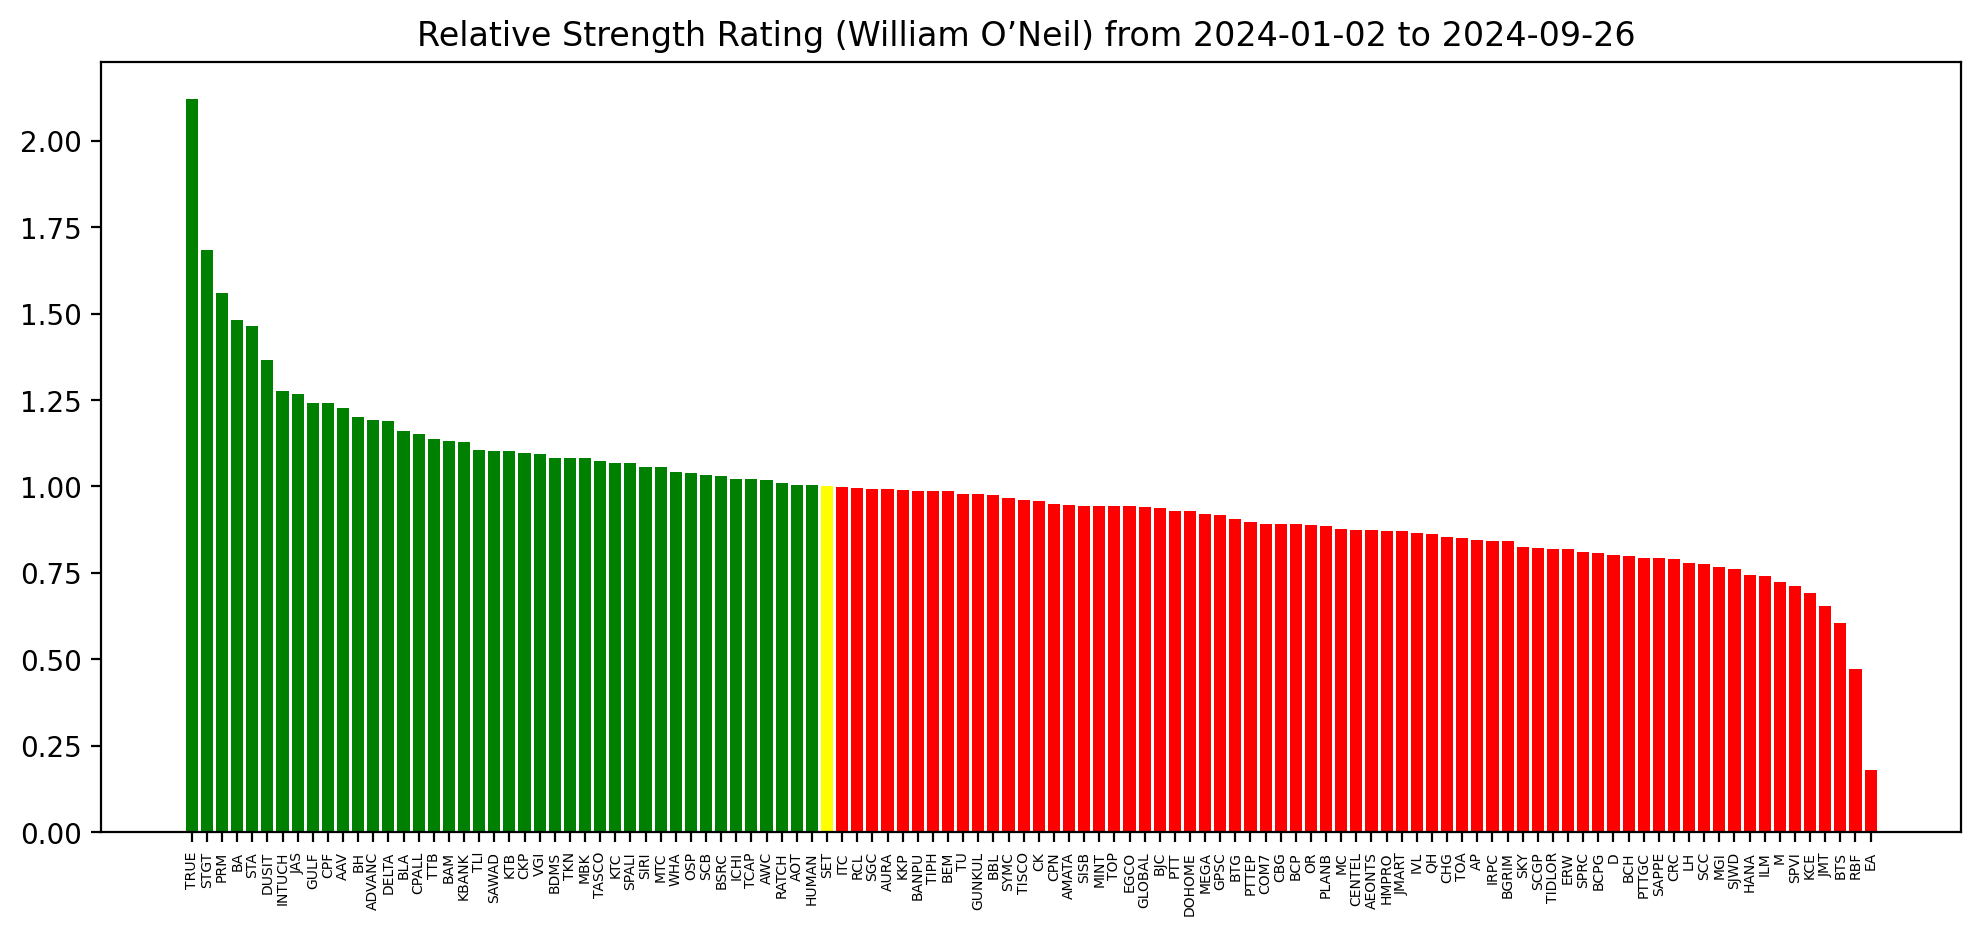

In [32]:
view_Relative_Strength_Rating() #base on set100 + extra

In [33]:
RS.to_csv('RS_Ranking.csv')

## Practics
- ทดลองนำไปใช้งานจริง หา Relative Strength ย้อนหลัง 1 ปี ของหุ้นในกลุ่ม SET100

In [200]:
import datetime
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML 
import time

# กำหนด path ไปยังโฟลเดอร์ 'libs' ที่อยู่ข้างนอกของ 'subfolder'
# ใช้ os.path.abspath สำหรับการรับ absolute path
libs_path = os.path.abspath(os.path.join(os.getcwd(), '..', ''))

# ใส่ path นี้ไปที่ตำแหน่งแรกใน sys.path เพื่อให้ Python ค้นหาที่นี่ก่อน
if libs_path not in sys.path:
    sys.path.insert(0, libs_path)

import starfishXapi as sx
from starfishXapi.set_api import indexType
sx.enable_autoreload()
print(sx.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Autoreload enabled.
0.00104


In [361]:
def get_period():
    current_date = str(datetime.datetime.now())[0:10]
    current_last_year = str(int(current_date[0:4])-1)+current_date[4:10]

    return current_last_year, current_date
def get_member():# หาสมาชิกในดัชนี set100
    member = sx.get_member_of_index(indexType.set100)
    basket = list(member['symbol'])
    basket.append('SET')
    
    # add member to basket 
    basket = basket + ['MC','JMART','JMT','SGC','DUSIT','ERW','BTG','SYMC','HUMAN','TKN','ILM','AURA','D','MGI','SPVI']
    basket = list(set(basket))
    return basket 
def pre_process_data(current_last_year,current_date,basket):
    # สร้าง object dataReader
    dataReader = sx.HistStockPrice()
    dataReader.openLog(directory='cache/') # สร้าง folder cache/
    start_date = current_last_year
    stop_date = current_date 
    folder = 'cache/'
    
    # preprocess data Load to Cache
    while(1):
      c = 0  
      try:  
        for i in basket:
          c+=1  
          print(i,end=',')    
          df = dataReader.getPrice(i,start=start_date,stop=stop_date,cache=True) # สำรองข้อมูลลง cache  
      except:
        time.sleep(3)
        print('try again')  
      if(c==len(basket)):
         print()
         print('success!!') 
         break 
def make_dataframe(basket):
    dataReader = sx.HistStockPrice()
    dataReader.openLog(directory='cache/') # สร้าง folder cache/    
    m = []
    for i in basket:  
     k = dataReader.getPrice(i,start=start_date,stop=stop_date,cache=True) 
     k = k[(k.index>=start_date) & (k.index<=stop_date)]    
     k = k[['close']]
     k.columns = [i]   
     m.append(k) 
    
    df = pd.concat(m,axis=1)
    df = df.bfill()
    return df

def cal_rs(df):
    start_date = df.index[0]
    stop_date =  df.index[-1] 
    
    SETBegin = df[df.index==start_date]['SET'].values[0]
    SETEnd = df[df.index==stop_date]['SET'].values[0]
    
    RS = (df[df.index==stop_date].values / df[df.index==start_date].values)    /    (SETEnd/SETBegin)
    return pd.DataFrame({'RS':RS[0]},index=df.columns)

def view_Relative_Strength_Rating(RS):
    color = []
    setvalue = RS[RS.index=='SET'].values[0][0]
    for i in RS['RS']:
        if(i>setvalue):
            color.append('green')
        elif(i<setvalue):
            color.append('red')
        else:
            color.append('yellow')
        
    plt.subplots(figsize=(12,5))
    plt.bar(x=RS.index,height=RS['RS'],color=color)
    plt.title(f"Relative Strength Rating (William O’Neil) from {start_date} to {stop_date} ")
    plt.xticks(rotation=90,fontsize=5)
    plt.show()

BCH,SKY,AURA,COM7,MINT,BDMS,CPALL,SGC,BEM,CRC,SIRI,HMPRO,GLOBAL,BCPG,LH,AMATA,HUMAN,BTS,SCGP,JMT,MC,TIPH,PTTEP,JAS,OSP,TOA,CPF,BSRC,CKP,KBANK,TIDLOR,RCL,TOP,PTTGC,SYMC,HANA,D,IRPC,QH,AOT,MBK,STA,CPN,AAV,TRUE,DELTA,IVL,STGT,BA,INTUCH,ITC,KTB,TASCO,DUSIT,TCAP,SPVI,OR,MEGA,KTC,PTT,VGI,TLI,BLA,ADVANC,TKN,SCC,TISCO,GUNKUL,JMART,KCE,SCB,TU,EGCO,SAPPE,BTG,AP,MGI,

KKP,BGRIM,BCP,BH,ERW,CK,SPALI,CENTEL,ILM,TTB,DOHOME,CBG,BANPU,AEONTS,GULF,PRM,SPRC,SAWAD,PLANB,AWC,MTC,SJWD,CHG,SISB,BJC,GPSC,RATCH,SET,EA,RBF,WHA,ICHI,BBL,M,BAM,
success!!


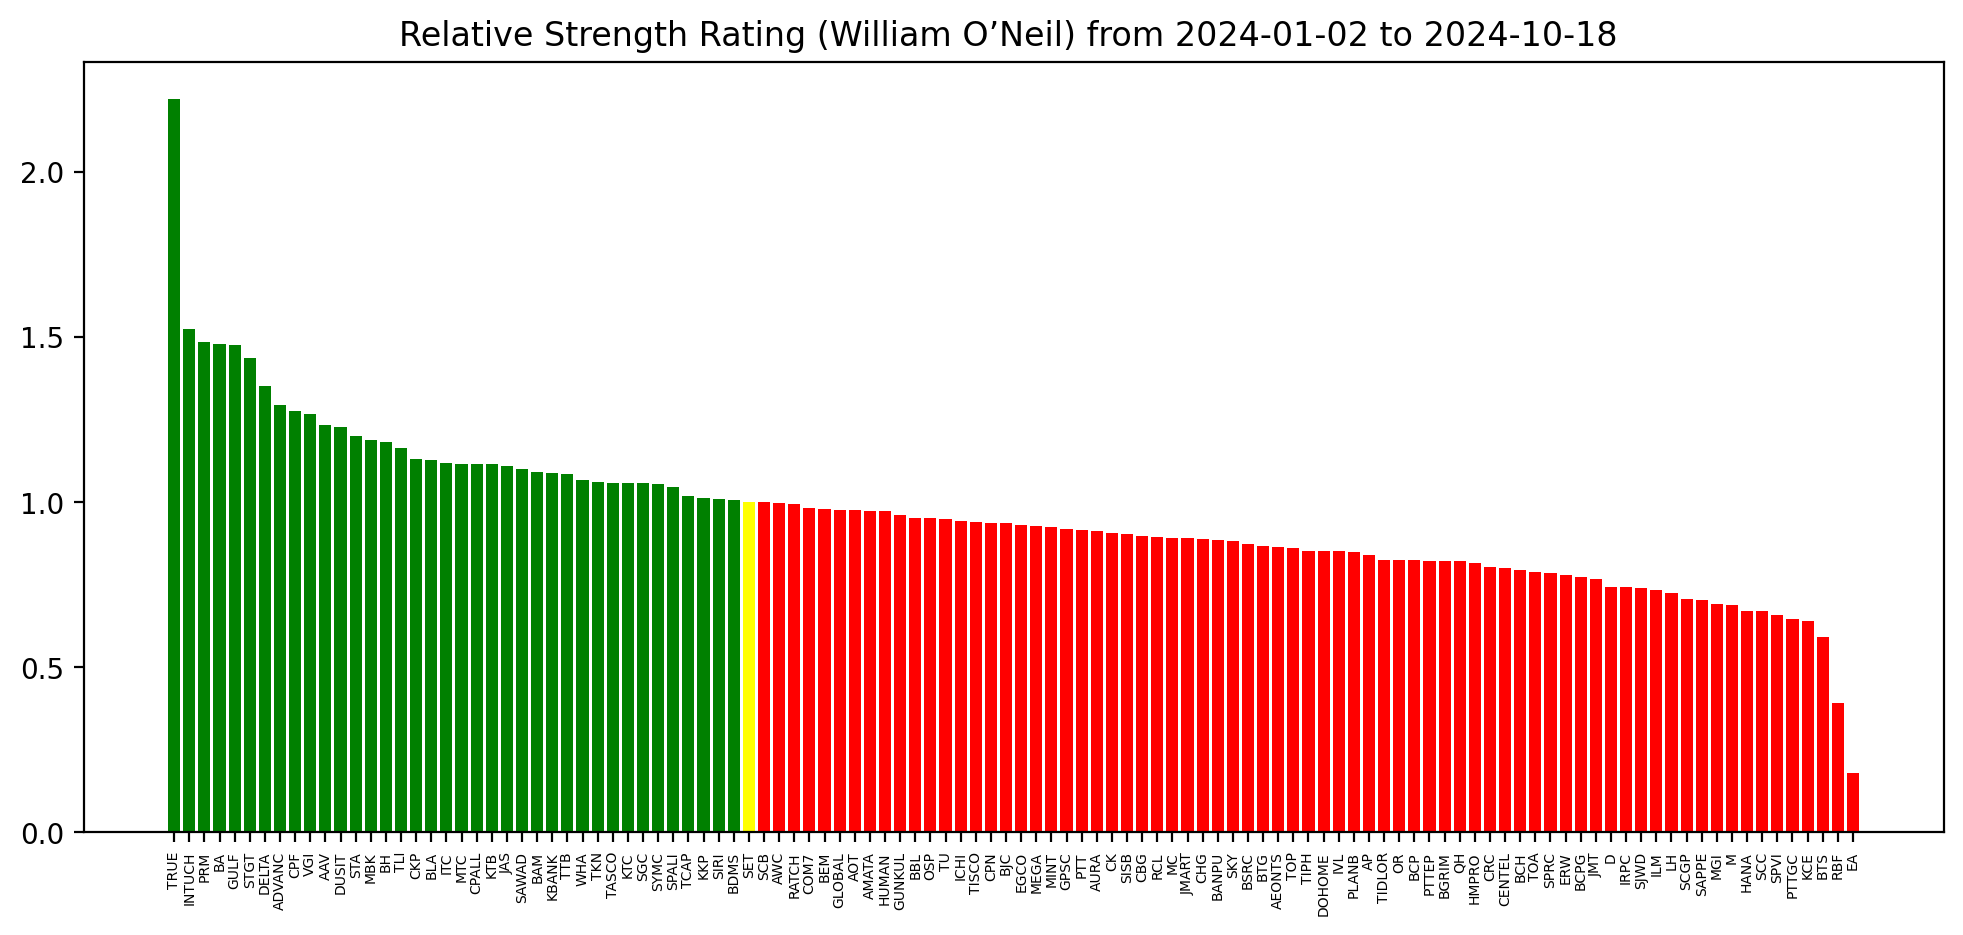

In [383]:
# เรียกใช้งานการหา Relative Strength Rating
current_last_year,current_date = get_period()
basket = get_member()
pre_process_data(current_last_year,current_date,basket)

df = make_dataframe(basket)
RS = cal_rs(df)
RS = sx.rankWithRange(data=RS,minScope=1,maxScope=99)
view_Relative_Strength_Rating(RS)

In [384]:
from IPython.display import HTML
html_data =RS.to_html()

# พิมพ์ HTML
display(HTML(html_data))